# Import Data

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Data Understanding

In [10]:
df = pd.read_csv("Student_performance_data _.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


# Preprocessing

## Data Wrangling

### Data Assessing

In [13]:
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB
None

Missing Values:
 S

In [14]:
duplikat = df.duplicated()

jumlah_duplikat = duplikat.sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

Jumlah baris duplikat: 0



Kolom: StudyTimeWeekly
Batas bawah: -9.0049, Batas atas: 28.4564
Jumlah outlier: 0

Kolom: Absences
Batas bawah: -15.5000, Batas atas: 44.5000
Jumlah outlier: 0

Kolom: GPA
Batas bawah: -0.9963, Batas atas: 4.7933
Jumlah outlier: 0


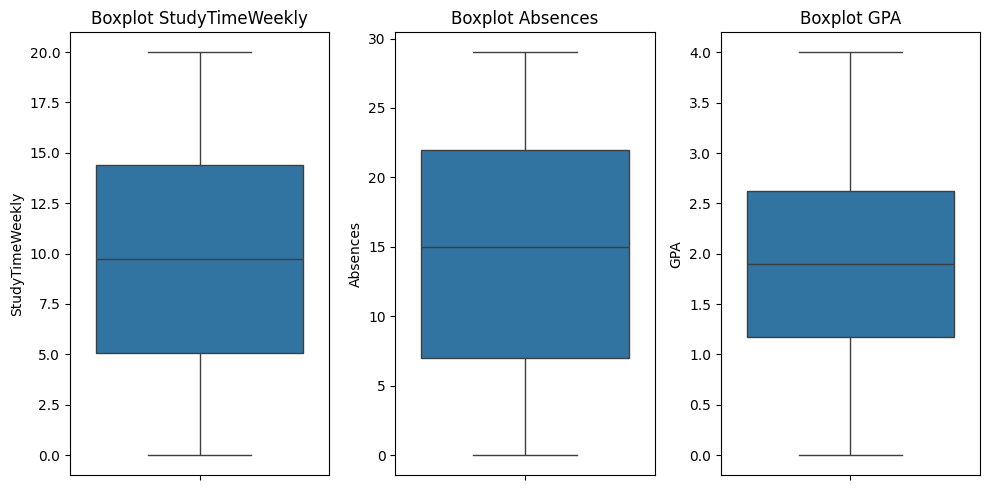

In [ ]:
kolom_numerik = ['StudyTimeWeekly', 'Absences', 'GPA']

# Fungsi untuk mendeteksi outlier dengan IQR
def cek_outlier(df, kolom):
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    outlier = df[(df[kolom] < batas_bawah) | (df[kolom] > batas_atas)]
    return len(outlier), outlier, batas_bawah, batas_atas

# Cek outlier untuk setiap kolom
for kolom in kolom_numerik:
    jumlah_outlier, outlier, batas_bawah, batas_atas = cek_outlier(df, kolom)
    print(f"\nKolom: {kolom}")
    print(f"Batas bawah: {batas_bawah:.4f}, Batas atas: {batas_atas:.4f}")
    print(f"Jumlah outlier: {jumlah_outlier}")
    if jumlah_outlier > 0:
        print("Contoh outlier:")
        print(outlier[[kolom]].head())

# Visualisasi dengan Boxplot
plt.figure(figsize=(10, 5))
for i, kolom in enumerate(kolom_numerik, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[kolom])
    plt.title(f"Boxplot {kolom}")
plt.tight_layout()
plt.show()

### Data Cleaning

Data sudah bersih tidak ada duplikat, tidak ada mising value

# prepocessing tambahan

In [ ]:
categorical_columns = ["Gender", "Ethnicity", "ParentalEducation", "Tutoring",
                       "ParentalSupport", "Extracurricular", "Sports", "Music", "Volunteering"]

# Inisialisasi LabelEncoder
encoder = LabelEncoder()

# Encode kolom kategorikal
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Tampilkan dataset setelah encoding
print(df.head())

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [16]:
scaler = MinMaxScaler()
numerical_cols = ["StudyTimeWeekly", "Absences", "GPA"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Cek hasil
print("Data setelah normalisasi:")
print(df[numerical_cols].head())
print("\nRentang nilai setelah normalisasi:")
print(df[numerical_cols].describe())

Data setelah normalisasi:
   StudyTimeWeekly  Absences       GPA
0         0.992773  0.241379  0.732299
1         0.771270  0.000000  0.760729
2         0.210718  0.896552  0.028151
3         0.501965  0.482759  0.513555
4         0.233840  0.586207  0.322015

Rentang nilai setelah normalisasi:
       StudyTimeWeekly     Absences          GPA
count      2392.000000  2392.000000  2392.000000
mean          0.489108     0.501427     0.476547
std           0.282964     0.291980     0.228789
min           0.000000     0.000000     0.000000
25%           0.252391     0.241379     0.293701
50%           0.485773     0.517241     0.473348
75%           0.721196     0.758621     0.655554
max           1.000000     1.000000     1.000000


# EDA

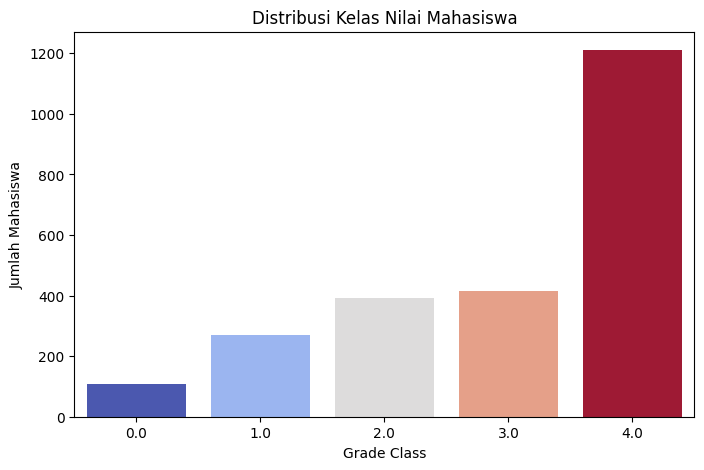

In [ ]:
# Distribusi hasil ujian
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="GradeClass", hue="GradeClass", palette="coolwarm", legend=False)
plt.title("Distribusi Kelas Nilai Mahasiswa")
plt.xlabel("Grade Class")
plt.ylabel("Jumlah Mahasiswa")
plt.show()

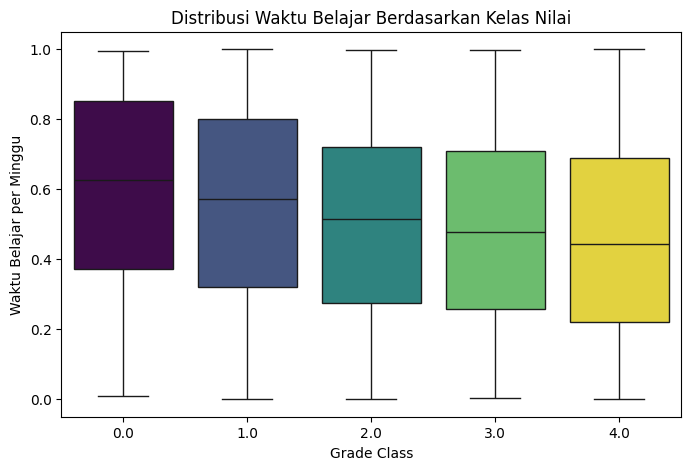

In [ ]:
# Hubungan Waktu Belajar dengan Nilai Ujian
plt.figure(figsize=(8, 5))
sns.boxplot(x="GradeClass", y="StudyTimeWeekly", hue="GradeClass", data=df, palette="viridis", legend=False)
plt.title("Distribusi Waktu Belajar Berdasarkan Kelas Nilai")
plt.xlabel("Grade Class")
plt.ylabel("Waktu Belajar per Minggu")
plt.show()

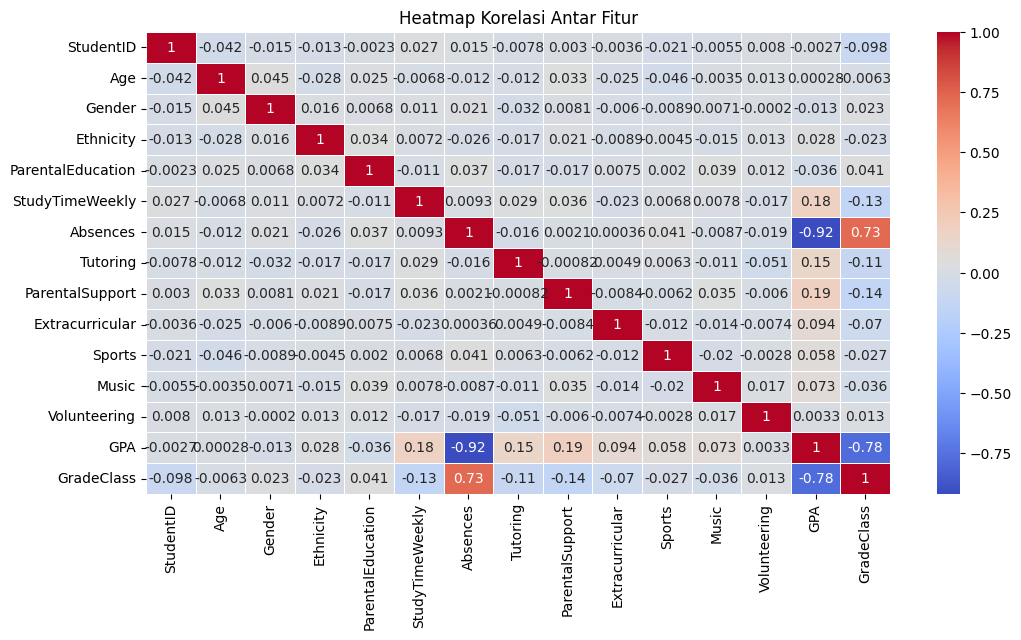

In [17]:
# Heatmap korelasi antar fitur
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

In [18]:
# Pilih hanya kolom yang memiliki korelasi tinggi dengan GPA dan GradeClass
selected_columns = ["StudyTimeWeekly", "Volunteering", "Tutoring", "ParentalEducation", "Absences", "GPA", "GradeClass"]
df_selected = df[selected_columns]

# Simpan dataset baru dengan kolom terpilih
df_selected.to_csv("selected_features.csv", index=False)

print(" Dataset dengan fitur terpilih berhasil disimpan!")

 Dataset dengan fitur terpilih berhasil disimpan!


In [22]:
# Load Data
df = pd.read_csv("selected_features.csv")  # Sesuaikan dengan lokasi dataset

# Buat Label Kelulusan (Lulus = 1, Tidak Lulus = 0)
df["GraduationStatus"] = df["GradeClass"].apply(lambda x: 1 if x in [0, 1, 2] else 0)

# Cek Jumlah Mahasiswa yang Lulus & Tidak Lulus
print(df["GraduationStatus"].value_counts())

# Tampilkan Beberapa Data Setelah Labeling
print(df[["GPA", "GradeClass", "GraduationStatus"]].head(10))


GraduationStatus
0    1625
1     767
Name: count, dtype: int64
        GPA  GradeClass  GraduationStatus
0  0.732299         2.0                 1
1  0.760729         1.0                 1
2  0.028151         4.0                 0
3  0.513555         3.0                 0
4  0.322015         4.0                 0
5  0.771046         1.0                 1
6  0.687059         2.0                 1
7  0.340036         4.0                 0
8  0.724205         2.0                 1
9  0.893369         0.0                 1


In [25]:
# Pilih Fitur dan Target
features = ["StudyTimeWeekly", "Volunteering", "Tutoring", "ParentalEducation", "Absences", "GPA"]
target = "GraduationStatus"

X = df[features].copy()
y = df[target]

# Encoding Variabel Kategorikal (Ubah ke Float64 setelah Encoding)
categorical_cols = ["Volunteering", "Tutoring", "ParentalEducation"]
for col in categorical_cols:
    X[col] = LabelEncoder().fit_transform(X[col]).astype(float)  # **Perbaikan: Konversi ke float**

# Normalisasi Fitur Numerik (Hanya Kolom Numerik)
scaler = MinMaxScaler()
numerical_cols = ["StudyTimeWeekly", "Absences", "GPA"]
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [26]:
# Split Data (80% Train, 20% Test dengan Stratifikasi)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(" Data siap digunakan untuk modeling.")

 Data siap digunakan untuk modeling.


# MODEL

## Decision tree C4.5

In [29]:
# Hyperparameter Tuning dengan GridSearchCV
param_grid = {
    'criterion': ['entropy'],
    'splitter': ['best'],
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': ['balanced'],
    'ccp_alpha': [0.0, 0.01, 0.05]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Training Model
grid_search.fit(X_train, y_train)

# Gunakan Model Terbaik
best_c45_model = grid_search.best_estimator_
print(f" Parameter terbaik untuk C4.5: {grid_search.best_params_}")

# Prediksi dengan Model Terbaik
y_pred = best_c45_model.predict(X_test)

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Decision Tree C4.5 setelah tuning: {accuracy:.4f}")
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 720 candidates, totalling 3600 fits
 Parameter terbaik untuk C4.5: {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}
Akurasi Decision Tree C4.5 setelah tuning: 0.9499
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       325
           1       0.97      0.87      0.92       154

    accuracy                           0.95       479
   macro avg       0.96      0.93      0.94       479
weighted avg       0.95      0.95      0.95       479



## Random forest

In [36]:
# Hyperparameter Tuning dengan GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'criterion': ['gini'],
    'max_depth': [5, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'class_weight': ['balanced']
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Training Model
grid_search_rf.fit(X_train, y_train)

# Gunakan Model Terbaik
best_rf_model = grid_search_rf.best_estimator_
print(f"Parameter terbaik untuk Random Forest: {grid_search_rf.best_params_}")

# Prediksi dengan Model Terbaik
y_pred_rf = best_rf_model.predict(X_test)

# Evaluasi Model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi Random Forest setelah tuning: {accuracy_rf:.4f}")
print("\n Laporan Klasifikasi:\n", classification_report(y_test, y_pred_rf))



Fitting 5 folds for each of 8 candidates, totalling 40 fits
Parameter terbaik untuk Random Forest: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Akurasi Random Forest setelah tuning: 0.9520

 Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       325
           1       0.97      0.88      0.92       154

    accuracy                           0.95       479
   macro avg       0.96      0.93      0.94       479
weighted avg       0.95      0.95      0.95       479



## SVM

In [27]:
# Hyperparameter Tuning dengan GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularisasi
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Jenis Kernel
    'gamma': ['scale', 'auto']  # Kernel Coefficient
}

svm_model = SVC(probability=True, random_state=42)
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Training Model
grid_search_svm.fit(X_train, y_train)

# Gunakan Model Terbaik
best_svm_model = grid_search_svm.best_estimator_
print(f"Parameter terbaik untuk SVM: {grid_search_svm.best_params_}")

# Prediksi dengan Model Terbaik
y_pred_svm = best_svm_model.predict(X_test)

# Evaluasi Model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Akurasi SVM setelah tuning: {accuracy_svm:.4f}")
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred_svm))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Parameter terbaik untuk SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Akurasi SVM setelah tuning: 0.9290

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       325
           1       0.90      0.88      0.89       154

    accuracy                           0.93       479
   macro avg       0.92      0.92      0.92       479
weighted avg       0.93      0.93      0.93       479



#VISUALISI MODEL DAN ANALISIS

<ipython-input-37-ade299c64bbf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="coolwarm")


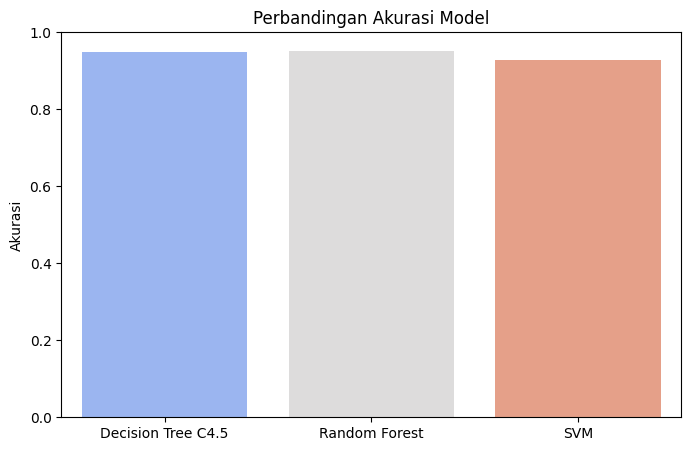

In [37]:
# Simpan hasil akurasi
model_names = ["Decision Tree C4.5", "Random Forest", "SVM"]
accuracies = [accuracy, accuracy_rf, accuracy_svm]

# 1. Visualisasi Perbandingan Akurasi Model
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette="coolwarm")
plt.ylim(0, 1)
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Akurasi")
plt.show()

Random Forest atau Decision Tree C4.5 lebih direkomendasikan untuk dataset ini karena memiliki prediksi yang lebih stabil dan lebih sedikit kesalahan dibandingkan SVM.

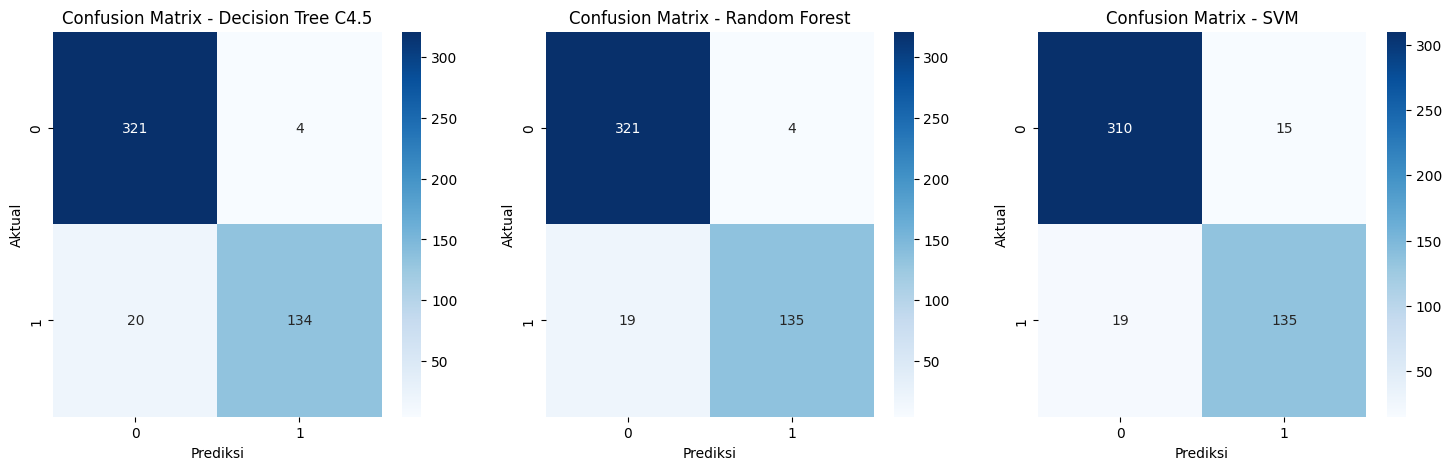

In [38]:
# 2. Confusion Matrix untuk Setiap Model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, model_name, y_pred in zip(axes, model_names, [y_pred, y_pred_rf, y_pred_svm]):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"Confusion Matrix - {model_name}")
    ax.set_xlabel("Prediksi")
    ax.set_ylabel("Aktual")

plt.show()

**ket**  

Decision Tree C4.5 dan Random Forest memiliki performa yang mirip, dengan 321 TN, 4 FP, 19-20 FN, dan 134-135 TP.
SVM memiliki sedikit lebih banyak kesalahan (15 FP), yang bisa menunjukkan kelemahan dalam memisahkan kelas negatif.

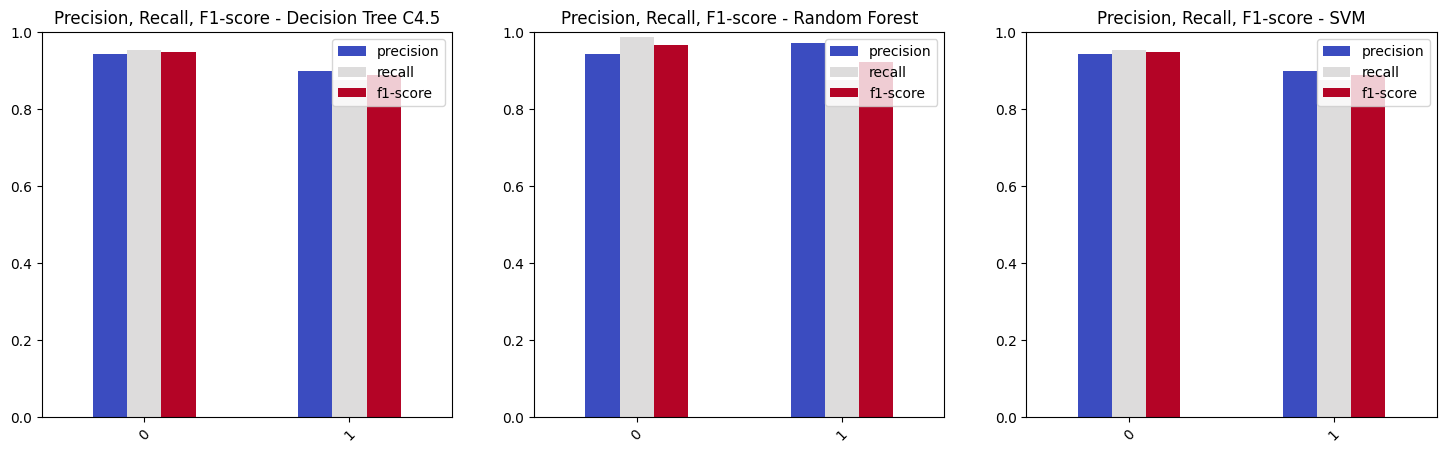

In [39]:
# 3. Precision, Recall, F1-score untuk Setiap Model
reports = {
    "Decision Tree C4.5": classification_report(y_test, y_pred, output_dict=True),
    "Random Forest": classification_report(y_test, y_pred_rf, output_dict=True),
    "SVM": classification_report(y_test, y_pred_svm, output_dict=True),
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (model_name, report) in zip(axes, reports.items()):
    df_report = pd.DataFrame(report).transpose().iloc[:-3, :-1]  # Hanya precision, recall, f1-score
    df_report.plot(kind="bar", ax=ax, colormap="coolwarm")
    ax.set_title(f"Precision, Recall, F1-score - {model_name}")
    ax.set_ylim(0, 1)
    ax.set_xticklabels(df_report.index, rotation=45)

plt.show()

**ket**

Decision Tree C4.5, Random Forest, dan SVM memiliki skor tinggi, menunjukkan performa klasifikasi yang baik.
Random Forest & SVM lebih stabil, cocok untuk generalisasi.
Decision Tree C4.5 lebih mudah diinterpretasi, tapi berisiko overfitting.

<ipython-input-40-1a3f8400cfb3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="GraduationStatus", data=df, palette="coolwarm")


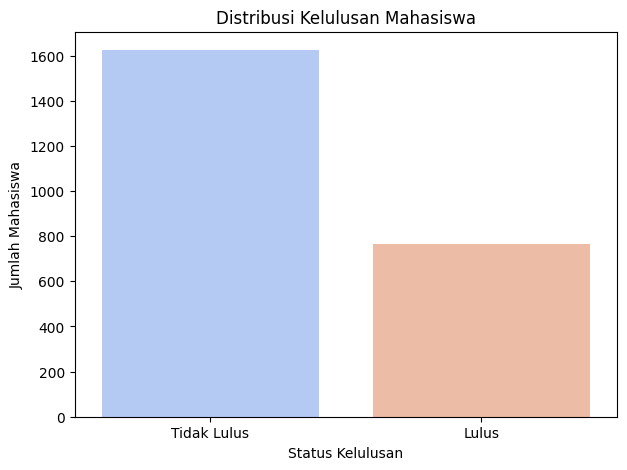

In [40]:
plt.figure(figsize=(7, 5))
sns.countplot(x="GraduationStatus", data=df, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Tidak Lulus", "Lulus"])
plt.title("Distribusi Kelulusan Mahasiswa")
plt.xlabel("Status Kelulusan")
plt.ylabel("Jumlah Mahasiswa")
plt.show()

In [54]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudyTimeWeekly    2392 non-null   float64
 1   Volunteering       2392 non-null   int64  
 2   Tutoring           2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   Absences           2392 non-null   float64
 5   GPA                2392 non-null   float64
 6   GradeClass         2392 non-null   float64
 7   GraduationStatus   2392 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 149.6 KB


(None,
    StudyTimeWeekly  Volunteering  Tutoring  ParentalEducation  Absences  \
 0         0.992773             0         1                  2  0.241379   
 1         0.771270             0         0                  1  0.000000   
 2         0.210718             0         0                  3  0.896552   
 3         0.501965             0         0                  3  0.482759   
 4         0.233840             0         1                  2  0.586207   
 
         GPA  GradeClass  GraduationStatus  
 0  0.732299         2.0                 1  
 1  0.760729         1.0                 1  
 2  0.028151         4.0                 0  
 3  0.513555         3.0                 0  
 4  0.322015         4.0                 0  )

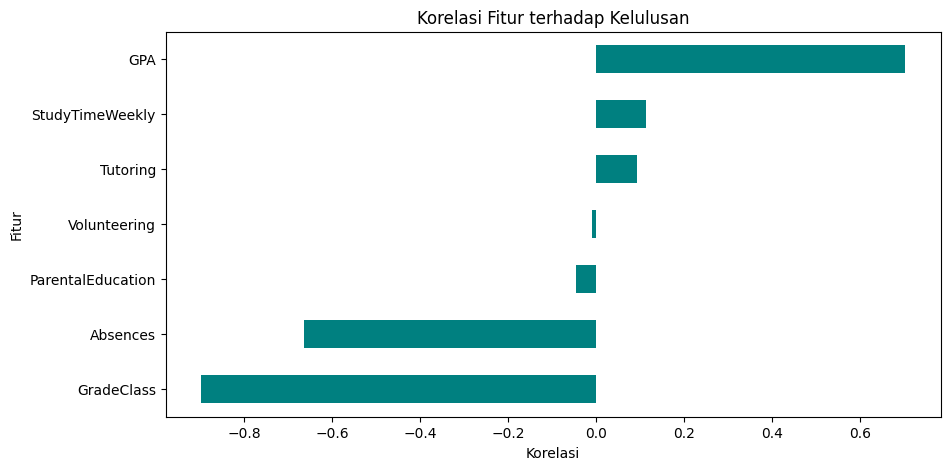

In [43]:
correlations = df.corr()["GraduationStatus"].drop("GraduationStatus").sort_values()

plt.figure(figsize=(10, 5))
correlations.plot(kind="barh", color="teal")
plt.title("Korelasi Fitur terhadap Kelulusan")
plt.xlabel("Korelasi")
plt.ylabel("Fitur")
plt.show()

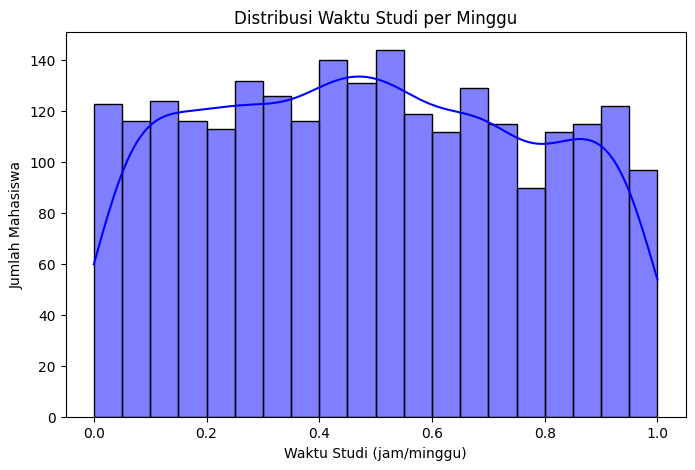

In [44]:
plt.figure(figsize=(8, 5))
sns.histplot(df["StudyTimeWeekly"], bins=20, kde=True, color="blue")
plt.title("Distribusi Waktu Studi per Minggu")
plt.xlabel("Waktu Studi (jam/minggu)")
plt.ylabel("Jumlah Mahasiswa")
plt.show()

**insight**
- Distribusi Waktu Studi
- Pola distribusi relatif merata dengan fluktuasi kecil.
- Mayoritas mahasiswa berada di rentang waktu studi menengah.

<ipython-input-52-9cd6836f9486>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pentingnya', y='Fitur', data=feature_importance, palette="coolwarm")


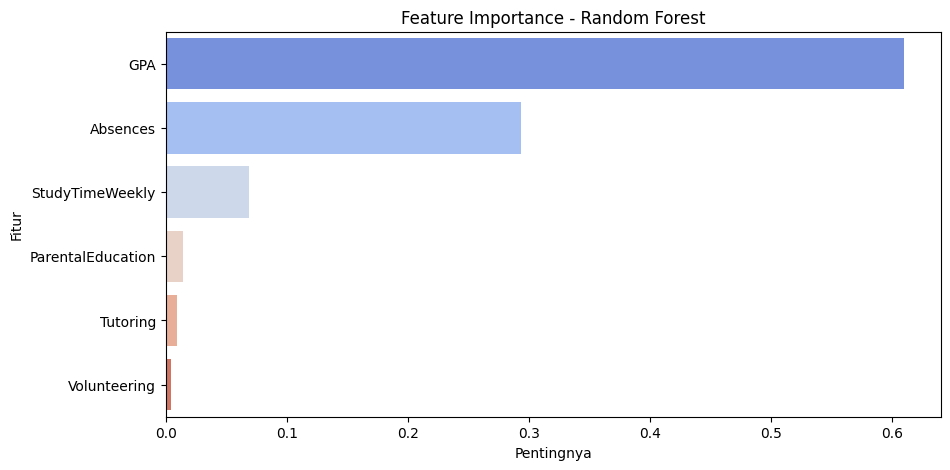

In [52]:
feature_importance = pd.DataFrame({
    'Fitur': X_train.columns,
    'Pentingnya': best_rf_model.feature_importances_
}).sort_values(by='Pentingnya', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Pentingnya', y='Fitur', data=feature_importance, palette="coolwarm")
plt.title("Feature Importance - Random Forest")
plt.show()

**insight**

GPA dan absensi adalah faktor paling berpengaruh dalam prediksi.
Waktu belajar memiliki dampak sedang.
Pendidikan orang tua, bimbingan, dan sukarela kurang signifikan.

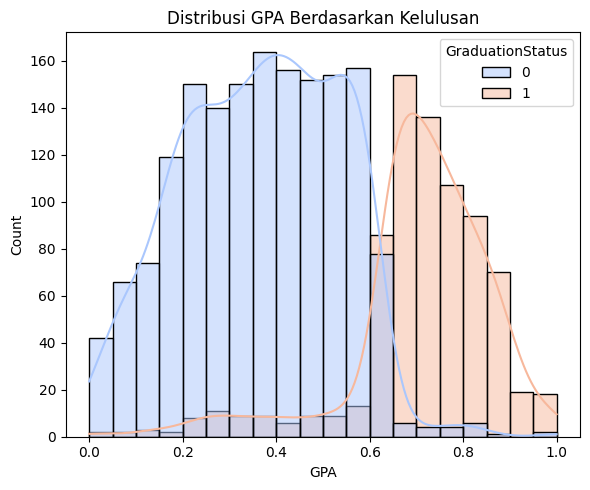

In [62]:
plt.figure(figsize=(6, 5))
sns.histplot(df, x="GPA", hue="GraduationStatus", bins=20, kde=True, palette="coolwarm")
plt.title("Distribusi GPA Berdasarkan Kelulusan")
plt.tight_layout()
plt.show()

**insight**

- Mahasiswa dengan GPA lebih tinggi memiliki peluang lebih besar untuk lulus.
- Sebagian besar mahasiswa yang tidak lulus memiliki GPA rendah, menunjukkan bahwa GPA merupakan faktor penting dalam keberhasilan akademik.

Meningkatkan GPA melalui bimbingan belajar, mentoring, atau program peningkatan akademik bisa menjadi strategi efektif untuk meningkatkan tingkat kelulusan.

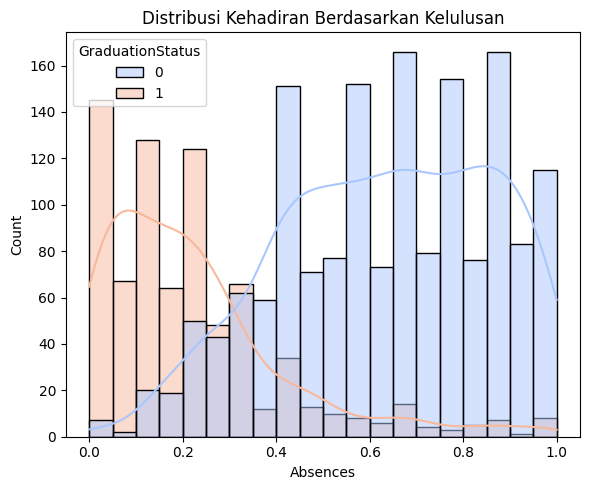

In [63]:
plt.figure(figsize=(6, 5))
sns.histplot(df, x="Absences", hue="GraduationStatus", bins=20, kde=True, palette="coolwarm")
plt.title("Distribusi Kehadiran Berdasarkan Kelulusan")
plt.tight_layout()
plt.show()

**insight**
- Mahasiswa yang memiliki banyak absensi cenderung memiliki tingkat kelulusan lebih rendah.
- Sebagian besar mahasiswa yang lulus memiliki kehadiran yang tinggi, menunjukkan bahwa kehadiran dalam kelas berperan penting dalam keberhasilan akademik.
- Jika ada mahasiswa yang banyak absen tapi tetap lulus, kemungkinan mereka memiliki cara belajar lain seperti belajar mandiri atau akses ke materi kuliah yang cukup

Menjaga disiplin kehadiran di kelas dan memastikan mahasiswa memiliki akses ke materi jika mereka terpaksa absen bisa membantu meningkatkan kelulusan.

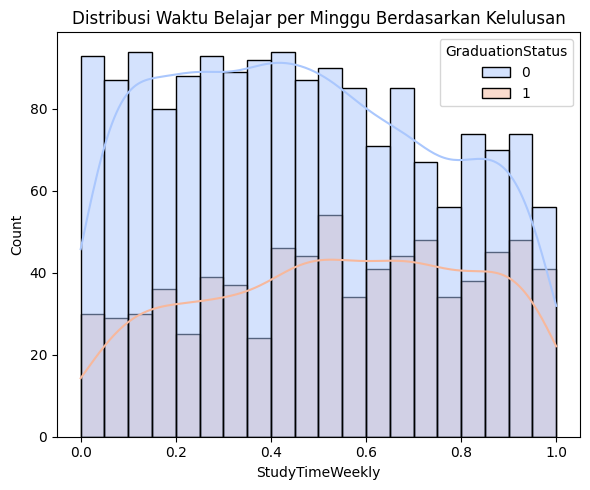

In [64]:
plt.figure(figsize=(6, 5))
sns.histplot(df, x="StudyTimeWeekly", hue="GraduationStatus", bins=20, kde=True, palette="coolwarm")
plt.title("Distribusi Waktu Belajar per Minggu Berdasarkan Kelulusan")
plt.tight_layout()
plt.show()

**insight**

- Mahasiswa yang menghabiskan lebih banyak waktu belajar per minggu cenderung memiliki tingkat kelulusan lebih tinggi.
- Jika ada mahasiswa yang belajar lebih banyak tetapi tetap tidak lulus, ini bisa menunjukkan bahwa kualitas belajar lebih penting daripada sekadar jumlah jam belajar.
- Jika distribusinya tidak jauh berbeda, bisa jadi faktor lain lebih dominan dalam menentukan kelulusan, seperti metode belajar atau lingkungan akademik.

Mendorong mahasiswa untuk memiliki strategi belajar yang efektif, seperti belajar dalam kelompok, menggunakan teknik aktif seperti retrieval practice, dan mengelola waktu dengan baik bisa membantu meningkatkan peluang kelulusan.

In [53]:
import pandas as pd
from google.colab import files

# Simpan data ke CSV
df.to_csv("data_cleaned.csv", index=False)  # Ganti 'df' dengan nama dataframe yang ingin disimpan

# Download file CSV
files.download("data_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>